**Exercise 1**  
  
The input layer simply passes the features to the first hidden layer.  
The first hidden layer runs $z^{(1)}_{1}=g(b_0 + w_1 x_1 + w_3 x_2)$ and $z^{(1)}_{2}=g(b_1 + w_2 x_1 + w_4 x_2)$  
The output unit runs $b_2 + w_5 z^{(1)}_{1} + w_6 z^{(1)}_{2}$ (no activation function)  

**Exercise 2**  

- Picture  
![](ex2.svg)  
  
- Parameters: 23  
- Plug in some values: Randomly drawn from normal distribution, I won't visualize it but I'm using the first 17 for weights, the last 6 for biases.

In [6]:
import numpy as np
np.set_printoptions(suppress=True)
np.random.seed(1337)
np.random.normal(size=23)

array([-0.70318731, -0.49028236, -0.32181433, -1.75507872,  0.20666447,
       -2.01126457, -0.55725071,  0.33721701,  1.54883597, -1.37073656,
        1.4252914 , -0.27946391, -0.55962791,  1.18638337,  1.69851891,
       -1.69122016, -0.69952284,  0.58296284,  0.97822263, -1.21737211,
       -1.32939545, -0.00145474, -1.31465268])

- Give some input: Let's say $20,5,16,0.2$.  
Layer 1:  
$$
\begin{align}
z^{(1)}_1&=\text{ReLU}(b_{0}+w_{1}20+w_{2}5+w_{3}16+w_{4}0.2) \\
z^{(1)}_{2}&=\text{ReLU}(b_{1}+w_{5}20+w_{6}5+w_{7}16+w_{8}0.2)
\end{align}
$$  
Layer 2:  
$$
\begin{align}
z^{(2)}_{1}&=\text{ReLU}(b_{2}+w_{9}z^{(1)}_{1}+w_{10}z^{(1)}_{2}) \\
z^{(2)}_{2}&=\text{ReLU}(b_{3}+w_{11}z^{(1)}_{1}+w_{12}z^{(1)}_{2}) \\
z^{(2)}_{3}&=\text{ReLU}(b_{4}+w_{13}z^{(1)}_{1}+w_{14}z^{(1)}_{2})
\end{align}
$$  
Output layer:  
$$
\hat{y}=b_{5}+w_{15}z^{(2)}_{1}+w_{16}z^{(2)}_{2}+w_{17}z^{(2)}_{3}
$$  
  
Now we put it all together in a BFE (big ~~fucking~~ fancy equation):  
$$
\begin{align}
\hat{y}&= \\
&b_{5}+ \\
&&w_{15}\text{ReLU}(b_{2}+ \\
&&&w_{9}\text{ReLU}(b_{0}+w_{1}20+w_{2}5+w_{3}16+w_{4}0.2)+ \\
&&&w_{10}\text{ReLU}(b_{1}+w_{5}20+w_{6}5+w_{7}16+w_{8}0.2) \\
&&)+ \\
&&w_{16}\text{ReLU}(b_{3}+ \\
&&&w_{11}\text{ReLU}(b_{0}+w_{1}20+w_{2}5+w_{3}16+w_{4}0.2)+ \\
&&&w_{12}\text{ReLU}(b_{1}+w_{5}20+w_{6}5+w_{7}16+w_{8}0.2) \\
&&)+ \\
&&w_{17}\text{ReLU}(b_{4}+ \\
&&&w_{13}\text{ReLU}(b_{0}+w_{1}20+w_{2}5+w_{3}16+w_{4}0.2)+ \\
&&&w_{14}\text{ReLU}(b_{1}+w_{5}20+w_{6}5+w_{7}16+w_{8}0.2) \\
&&)
\end{align}
$$  
  
and now I substitute the weights and biases for their actual numbers...
$$
\begin{align}
\hat{y}&= \\
&(-1.3)+ \\
&&(1.7)\text{ReLU}((-1.2)+ \\
&&&(1.6)\text{ReLU}((0.6)+(-0.7)20+(-0.5)5+(-0.3)16+(-1.8)0.2)+ \\
&&&(-1.4)\text{ReLU}((1)+(0.2)20+(-2)5+(-0.6)16+(0.3)0.2) \\
&&)+ \\
&&(-1.7)\text{ReLU}((-1.3)+ \\
&&&(1.4)\text{ReLU}((0.6)+(-0.7)20+(-0.5)5+(-0.3)16+(-1.8)0.2)+ \\
&&&(-0.3)\text{ReLU}((1)+(0.2)20+(-2)5+(-0.6)16+(0.3)0.2) \\
&&)+ \\
&&(-0.7)\text{ReLU}((0)+ \\
&&&(-0.6)\text{ReLU}((0.6)+(-0.7)20+(-0.5)5+(-0.3)16+(-1.8)0.2)+ \\
&&&(1.2)\text{ReLU}((1)+(0.2)20+(-2)5+(-0.6)16+(0.3)0.2) \\
&&)
\end{align}
$$
calculation time
$\hat{y}=-1.3$ which is literally equal to $b_5$ which means i managed to kill every single neuron on my first attempt that is awesome.

**Exercise 3**
Someone else did it for me:
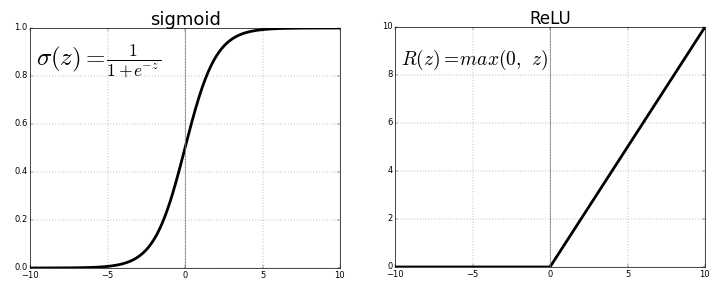

- Bias shifts the x-coordinate in the activation function. So if the weights*inputs were to be 4, and the bias is 2.1, the activation functoin would get 4+2.1 as its input.

Playground! https://playground.tensorflow.org/